In [18]:
import numpy as np
from scipy import stats
from scipy.io import arff
import pandas as pd
import math 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing

from scipy.stats import norm, probplot
from scipy.stats import chi2_contingency

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [20]:
# Load the ARFF file
data_year1 = arff.loadarff('1year.arff')
data_year2 = arff.loadarff('2year.arff')
data_year3 = arff.loadarff('3year.arff')
data_year4 = arff.loadarff('4year.arff')
data_year5 = arff.loadarff('5year.arff')

# Convert the ARFF data to a pandas DataFrame
df1 = pd.DataFrame(data_year1[0])
df2 = pd.DataFrame(data_year2[0])
df3 = pd.DataFrame(data_year3[0])
df4 = pd.DataFrame(data_year4[0])
df5 = pd.DataFrame(data_year5[0])

# Save the DataFrame as a CSV file
df1.to_csv('year1.csv', index=False)
df2.to_csv('year2.csv', index=False)
df3.to_csv('year3.csv', index=False)
df4.to_csv('year4.csv', index=False)
df5.to_csv('year5.csv', index=False)


In [21]:
df_dict = {'df1': df1.shape, 'df2': df2.shape, 'df3': df3.shape, 'df4': df4.shape, 'df5': df5.shape}

# create a new dataframe from the dictionary
df_shape = pd.DataFrame.from_dict(df_dict, orient='index', columns=['rows', 'columns'])

print(df_shape)

      rows  columns
df1   7027       65
df2  10173       65
df3  10503       65
df4   9792       65
df5   5910       65


In [22]:
df1['bankruptcy'] = df1['class'].apply(lambda x: 0 if x == b'0' else 1)
df2['bankruptcy'] = df2['class'].apply(lambda x: 0 if x == b'0' else 2)
df3['bankruptcy'] = df3['class'].apply(lambda x: 0 if x == b'0' else 3)
df4['bankruptcy'] = df4['class'].apply(lambda x: 0 if x == b'0' else 4)
df5['bankruptcy'] = df5['class'].apply(lambda x: 0 if x == b'0' else 5)

In [23]:
df1['bankruptcy'].value_counts() 

0    6756
1     271
Name: bankruptcy, dtype: int64

In [24]:
samples = []
samples.append(df1)
samples.append(df2)
samples.append(df3)
samples.append(df4)
samples.append(df5)

df = pd.concat(samples, ignore_index=True)

In [25]:
df['class'] = df['class'].apply(lambda x: 0 if x == b'0' else 1)

In [26]:
print(df['class'].value_counts())
print(df['bankruptcy'].value_counts())

0    41314
1     2091
Name: class, dtype: int64
0    41314
4      515
3      495
5      410
2      400
1      271
Name: bankruptcy, dtype: int64


In [27]:
percent_missing = df.isnull().sum() / df.shape[0] * 100.00
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
Attr37,Attr37,43.736897
Attr21,Attr21,13.486925
Attr27,Attr27,6.367930
Attr60,Attr60,4.957954
Attr45,Attr45,4.946435
...,...,...
Attr57,Attr57,0.016127
Attr59,Attr59,0.016127
Attr55,Attr55,0.002304
class,class,0.000000


In [28]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,bankruptcy
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000,43405.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592,0.048174,0.153577
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482,0.214137,0.740377
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000,0.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800,0.000000,0.000000
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500,0.000000,0.000000
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200,0.000000,0.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000,5.000000


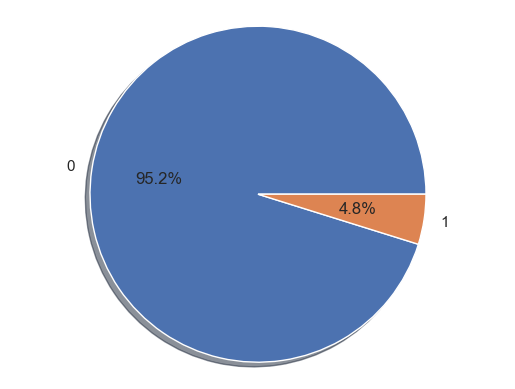

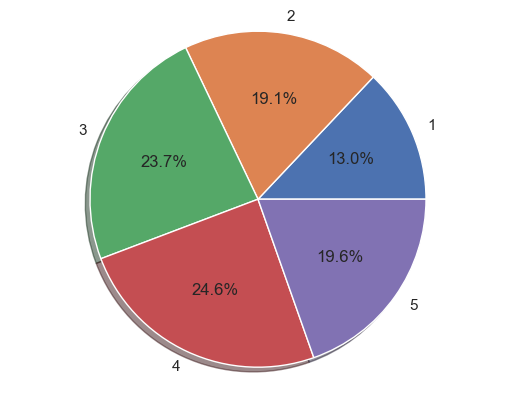

In [29]:
def draw_pie_chart(df, fre):
    labels = df[fre].astype('category').cat.categories.tolist()
    counts = df[fre].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    ax1.axis('equal')
    plt.show()

draw_pie_chart(df, 'class')
draw_pie_chart(df[df['bankruptcy'] > 0], 'bankruptcy')

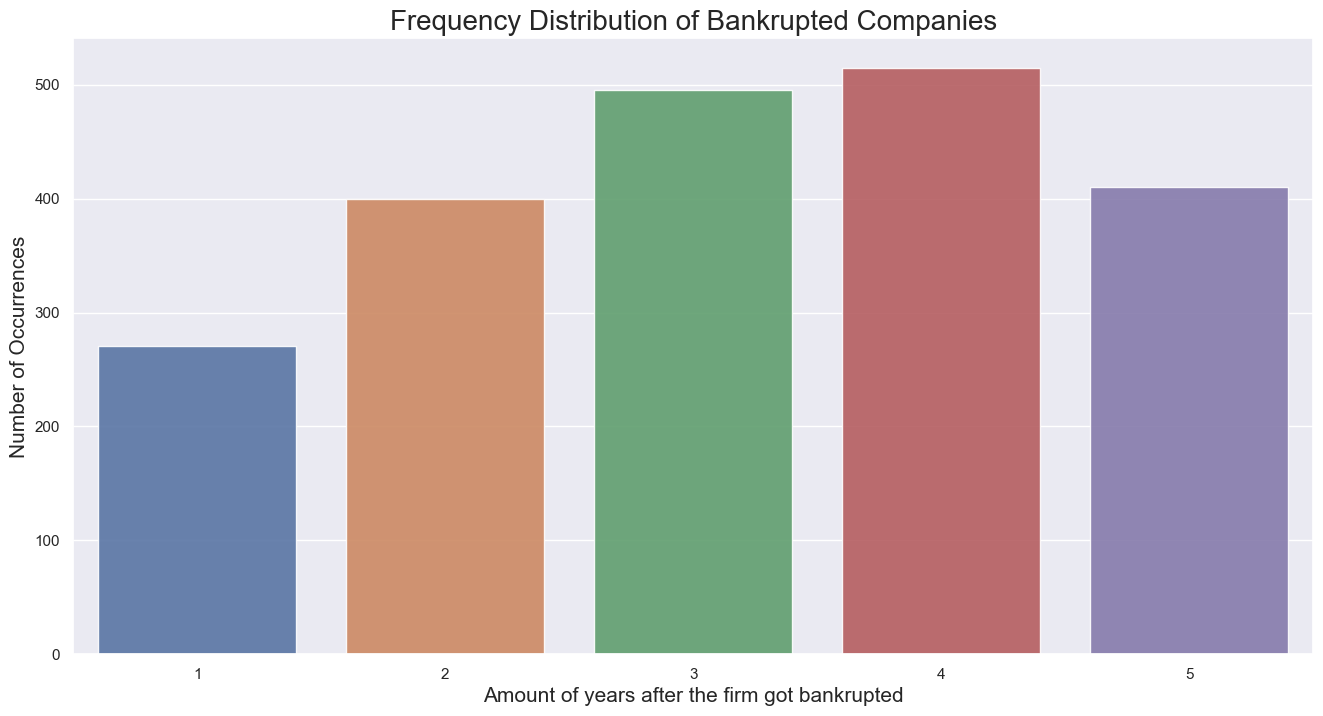

In [30]:
plt.figure(figsize=(16, 8))
temp = df[df['bankruptcy'] > 0]
count = temp['bankruptcy'].value_counts()
del temp
sns.set(style="darkgrid")
sns.barplot(x=count.index, y=count.values, alpha=0.9)
plt.title('Frequency Distribution of Bankrupted Companies', fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Amount of years after the firm got bankrupted', fontsize=15)
plt.show()

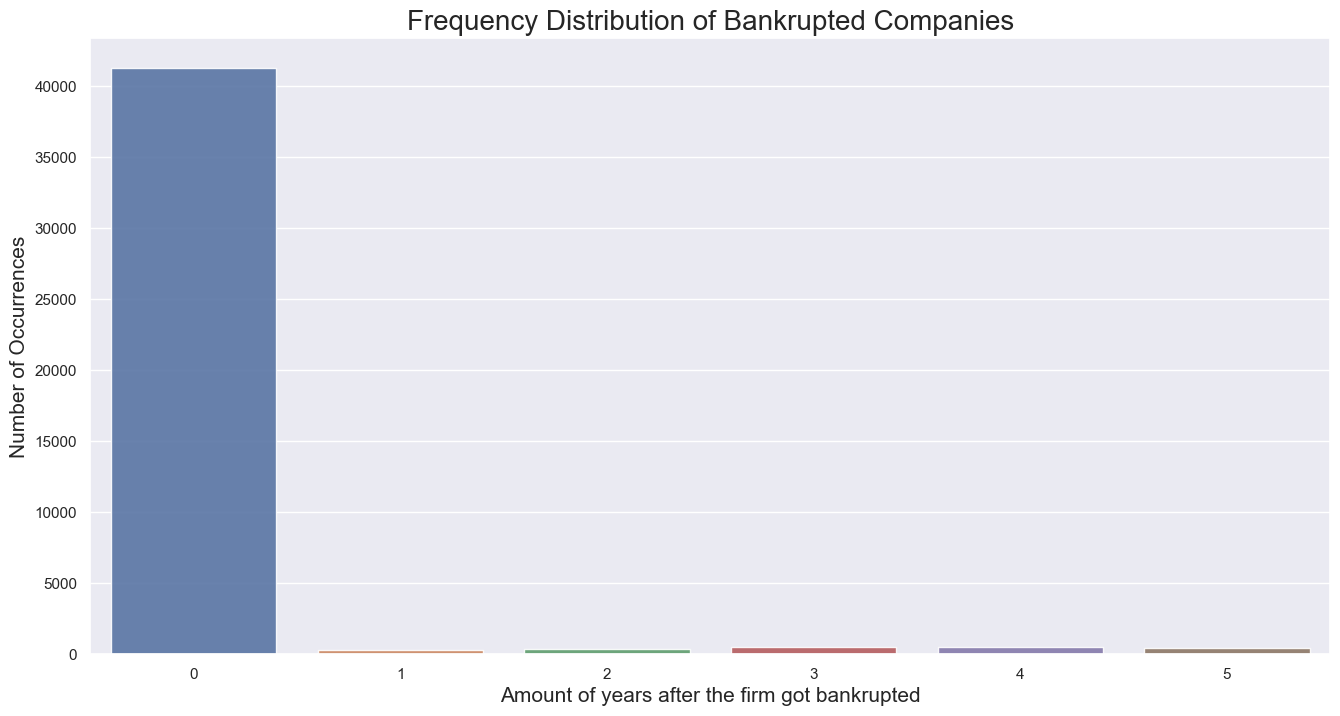

In [31]:
plt.figure(figsize=(16, 8))
count = df['bankruptcy'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=count.index, y=count.values, alpha=0.9)
plt.title('Frequency Distribution of Bankrupted Companies', fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Amount of years after the firm got bankrupted', fontsize=15)
plt.show()

In [32]:
# group the dataframe by the "class" column
groups = df.groupby('class')

# create two separate dataframes based on the groups
df_0 = groups.get_group(0)
df_1 = groups.get_group(1)

In [33]:
# get the count of NaN values in each column
na_count = df_0.isna().sum()

# get the (column, count) pairs as a list of tuples
na_count_pairs = list(na_count.items())

# sort the list in descending order of count
na_count_pairs_sorted = sorted(na_count_pairs, key=lambda x: x[1], reverse=True)

# print the (column, count) pairs in descending order of count
for column, count in na_count_pairs_sorted:
    print(column, count)

Attr37 18007
Attr21 5239
Attr27 2049
Attr60 1976
Attr45 1971
Attr24 921
Attr41 754
Attr28 732
Attr53 732
Attr54 732
Attr64 732
Attr32 356
Attr52 299
Attr47 296
Attr4 128
Attr12 128
Attr33 128
Attr40 128
Attr46 128
Attr63 128
Attr19 117
Attr13 116
Attr20 116
Attr23 116
Attr30 116
Attr31 116
Attr39 116
Attr42 116
Attr43 116
Attr44 116
Attr49 116
Attr56 116
Attr62 116
Attr61 94
Attr16 90
Attr26 90
Attr5 89
Attr8 89
Attr17 89
Attr34 89
Attr50 89
Attr58 77
Attr15 36
Attr9 8
Attr48 8
Attr1 7
Attr2 7
Attr3 7
Attr6 7
Attr7 7
Attr10 7
Attr11 7
Attr14 7
Attr18 7
Attr22 7
Attr25 7
Attr29 7
Attr35 7
Attr36 7
Attr38 7
Attr51 7
Attr57 5
Attr59 5
Attr55 1
class 0
bankruptcy 0


In [34]:
# get the count of NaN values in each column
na_count = df_1.isna().sum()

# get the (column, count) pairs as a list of tuples
na_count_pairs = list(na_count.items())

# sort the list in descending order of count
na_count_pairs_sorted = sorted(na_count_pairs, key=lambda x: x[1], reverse=True)

# print the (column, count) pairs in descending order of count
for column, count in na_count_pairs_sorted:
    print(column, count)

Attr37 977
Attr27 715
Attr21 615
Attr45 176
Attr60 176
Attr28 80
Attr53 80
Attr54 80
Attr64 80
Attr11 37
Attr32 12
Attr13 11
Attr19 11
Attr20 11
Attr23 11
Attr30 11
Attr31 11
Attr39 11
Attr42 11
Attr43 11
Attr44 11
Attr49 11
Attr56 11
Attr62 11
Attr61 8
Attr46 7
Attr58 7
Attr4 6
Attr12 6
Attr33 6
Attr40 6
Attr63 6
Attr8 5
Attr16 5
Attr17 5
Attr26 5
Attr34 5
Attr50 5
Attr52 2
Attr57 2
Attr59 2
Attr1 1
Attr2 1
Attr3 1
Attr6 1
Attr7 1
Attr9 1
Attr10 1
Attr14 1
Attr18 1
Attr22 1
Attr24 1
Attr25 1
Attr29 1
Attr35 1
Attr36 1
Attr38 1
Attr47 1
Attr48 1
Attr51 1
Attr5 0
Attr15 0
Attr41 0
Attr55 0
class 0
bankruptcy 0


In [35]:
df = df.drop(['Attr37','Attr27','Attr21'], axis = 1)

In [36]:
df = df.dropna()

In [37]:
df.shape

(38900, 63)

In [38]:
# group the dataframe by the "class" column
groups = df.groupby('class')

# create two separate dataframes based on the groups
df_0 = groups.get_group(0)
df_1 = groups.get_group(1)

df_1.shape

(1828, 63)

In [39]:
df_0.shape

(37072, 63)

In [40]:
corr_matrix = df.corr().round(2)

# compute the p-values for the correlation coefficients
p_values = df.corr(method=lambda x, y: stats.pearsonr(x, y)[1].round(3)) - np.eye(len(df.columns))

In [ ]:
plt.figure(figsize=(40,40))
plot = sns.heatmap(p_values, annot = corr_matrix, center = 0.05)

In [75]:
plt.figure(figsize=(80,80))
plot = sns.heatmap(corr_matrix, annot = corr_matrix)

In [44]:
X = df.drop(['class','bankruptcy'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 100)

In [45]:
#Define a function that trains and predicts models

#input: model, sample size, training data and test data
#output: accuracy, Percision, Recall, AUC, and F1 score of all 5 models plus a confusion matrix, ROC curve, and PR curve per model.

def model_results(model, sample_size, X_train, y_train, X_test, y_test): 
    output = {}
    model.fit(X_train[:sample_size], y_train[:sample_size])
    
    #Predictions
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
            
    #Accuracy of train data
    output['acc_train'] = accuracy_score(y_train, predictions_train)
    #Accuracy of test data
    output['acc_test'] = accuracy_score(y_test, predictions_test)

    #Precision of train data
    output['pre_train'] = precision_score(y_train, predictions_train)
    #Precision of test data
    output['pre_test'] = precision_score(y_test, predictions_test)

    #Recall of train data
    output['rec_train'] = recall_score(y_train, predictions_train)
    #Recall of test data
    output['rec_test'] = recall_score(y_test, predictions_test)
    
    #F1-score of train data
    output['f_train'] = fbeta_score(y_train, predictions_train, beta=1)
    #F1-score of test data
    output['f_test'] = fbeta_score(y_test, predictions_test, beta=1)
    
    #AUC of train data
    output['auc_train'] = roc_auc_score(y_train,predictions_train)
    #AUC of test data
    output['auc_test'] = roc_auc_score(y_test,predictions_test)
       
    
    print ("{} trained on {} samples.".format(model.__class__.__name__, sample_size))
    print ("{} with Accuracy {}, Precision {}, Recall {}, F1 {}, and AUC {}.".format(model.__class__.__name__,\
          output['acc_test'],output['pre_test'],output['rec_test'],output['f_test'], output['auc_test']) )
    
    #Confusion Matrix
    print("Confusion Matrix :")
    print("\n")
    cm = confusion_matrix(y_test, predictions_test)
    data_cm = pd.DataFrame(cm, range(2), range(2))
    plt.figure(figsize=(5,5))
    sns.set(font_scale=1.4) #label size
    sns.heatmap(data_cm, annot=True, annot_kws={"size": 16},fmt='g') #font size

    #AUC Curve plot
    auc = metrics.roc_auc_score(y_test, predictions_test)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions_test,pos_label = 1.0)
    plt.figure(figsize=(5,4), dpi=100)
    plt.axis('scaled')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title("AUC and ROC Curves", fontsize=16)
    plt.plot(false_positive_rate, true_positive_rate, 'c')
    plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
    plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='dimgrey')
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.show()


    #Precision-Recall Curve plot
    from sklearn.metrics import precision_recall_curve
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')
    plt.show()
    return output

In [46]:
def apply_resampling_and_evaluate(resampling_method, X_train, y_train, X_val, y_val):
    X_resampled, y_resampled = resampling_method.fit_resample(X_train, y_train)

    # Shuffle the resampled data
    X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=15)

    # Train and evaluate models using the resampled data
    logreg = LogisticRegression()
    print("\nLogistic Regression with", resampling_method.__class__.__name__)
    model_results(logreg, len(X_resampled), X_resampled, y_resampled, X_val, y_val)

-----Under-sampling-----

Logistic Regression with RandomUnderSampler
LogisticRegression trained on 2558 samples.
LogisticRegression with Accuracy 0.5717223650385604, Precision 0.07252494244052188, Recall 0.6974169741697417, F1 0.13138686131386862, and AUC 0.6315086308663231.
Confusion Matrix :




/Users/siddartha/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


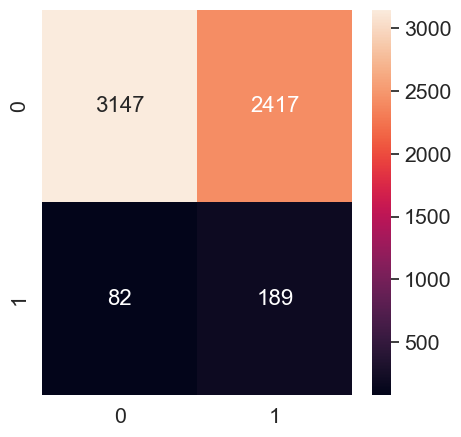

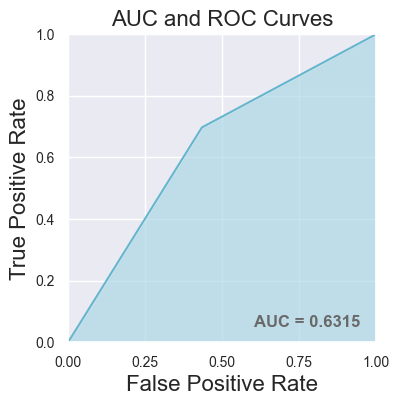

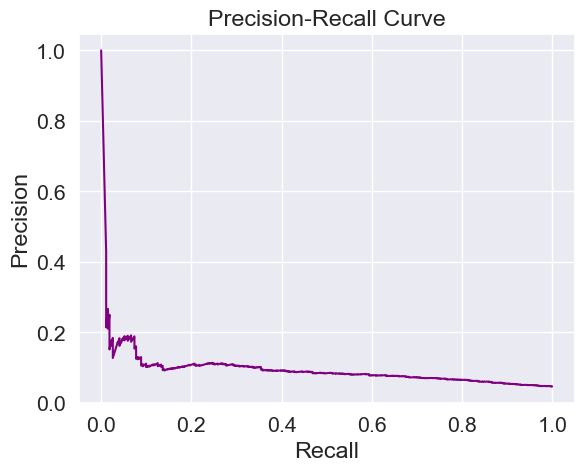


-----Over-sampling-----

Logistic Regression with RandomOverSampler


/Users/siddartha/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression trained on 51902 samples.
LogisticRegression with Accuracy 0.6049700085689803, Precision 0.07695507487520799, Recall 0.6826568265682657, F1 0.1383177570093458, and AUC 0.6419215117744275.
Confusion Matrix :




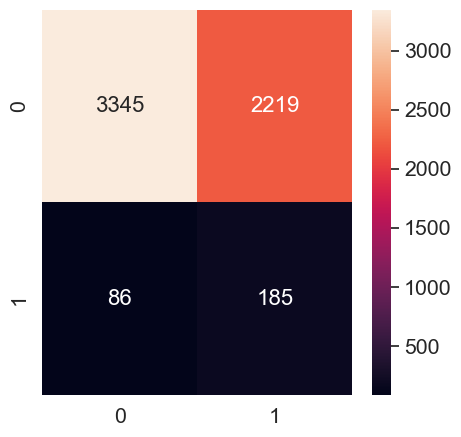

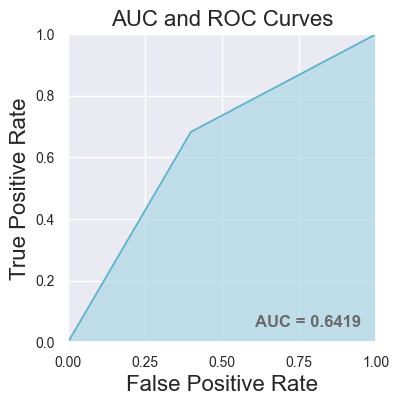

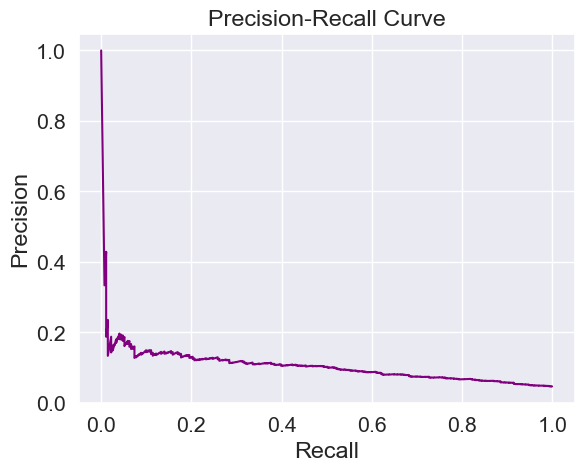


-----SMOTE-----

Logistic Regression with SMOTE


/Users/siddartha/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression trained on 51902 samples.
LogisticRegression with Accuracy 0.6886032562125107, Precision 0.08485499462943072, Recall 0.5830258302583026, F1 0.14814814814814814, and AUC 0.6383856685439607.
Confusion Matrix :




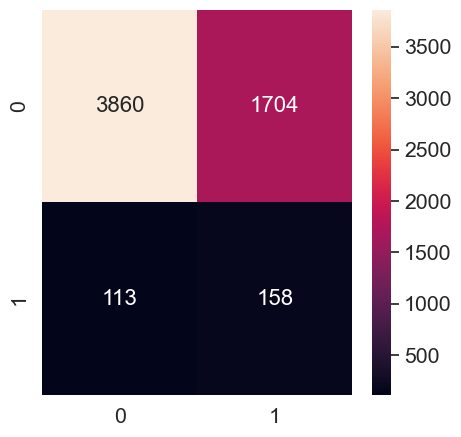

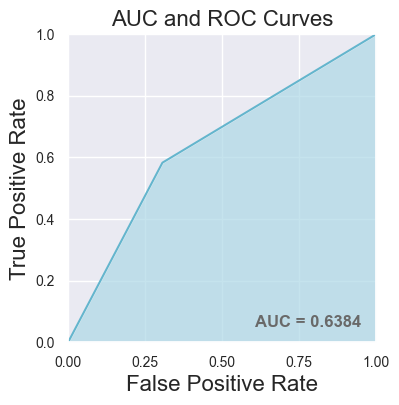

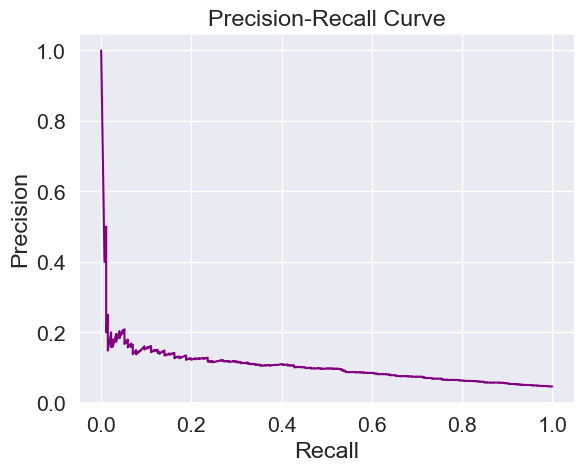

In [47]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

# Under-sampling
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=452)
print("-----Under-sampling-----")
apply_resampling_and_evaluate(undersample, X_train, y_train, X_val, y_val)

# Over-sampling
oversample = RandomOverSampler(sampling_strategy='minority', random_state=452)
print("\n-----Over-sampling-----")
apply_resampling_and_evaluate(oversample, X_train, y_train, X_val, y_val)

# SMOTE
smote = SMOTE(random_state=452)
print("\n-----SMOTE-----")
apply_resampling_and_evaluate(smote, X_train, y_train, X_val, y_val)

Under-sampling: Accuracy 0.57, Precision 0.072, Recall 0.69, F1 0.13, and AUC 0.63

Over-sampling:  Accuracy 0.61, Precision 0.077, Recall 0.68, F1 0.14, and AUC 0.64

Smote:          Accuracy 0.69, Precision 0.085, Recall 0.58, F1 0.15, and AUC 0.64

In [68]:
# from sklearn.utils import resample

# # Separate the majority and minority classes
# majority_class = df[df['class']==0]
# minority_class = df[df['class']==1]

# # Undersample the majority class
# majority_class_downsampled = resample(majority_class,
#                                        replace=False, # Sample without replacement
#                                        n_samples=len(minority_class)+344, # Match minority class size
#                                        random_state=452) # Reproducible results

# # Combine the minority class and the downsampled majority class
# balanced_data = pd.concat([majority_class_downsampled, minority_class])

# # Shuffle the data
# balanced_data = balanced_data.sample(frac=1, random_state=15)

In [48]:
from imblearn.over_sampling import SMOTE

df_ds = df

# Separate the features and target variable
X = df_ds.drop(['class'], axis=1)
y = df_ds['class']

# Instantiate a SMOTE object
smote = SMOTE(random_state=472)

# Fit and apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled data into a new DataFrame
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=1)

In [49]:
balanced_data.shape

(74144, 63)

In [50]:
# Splitting the dataset 70% training and 30% test

X = balanced_data.drop(['class','bankruptcy'], axis=1)
y = balanced_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

/Users/siddartha/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression trained on 51900 samples.
LogisticRegression with Accuracy 0.625427081460169, Precision 0.689848869867594, Recall 0.4617312684629845, F1 0.5531960531960531, and AUC 0.6261514646297583.
Confusion Matrix :




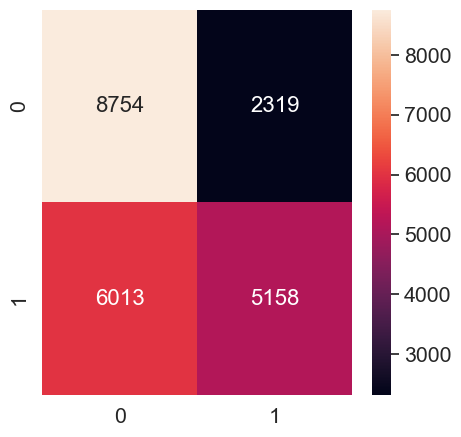

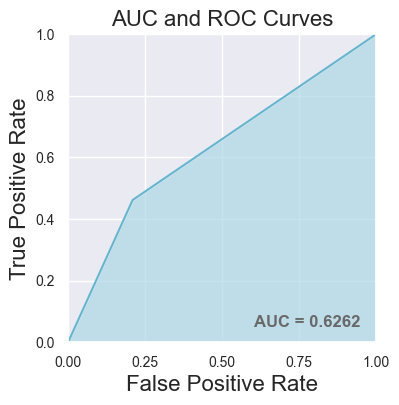

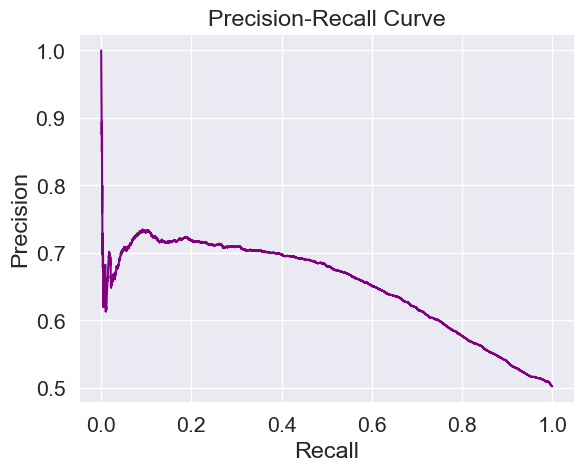

{'acc_train': 0.6276107899807322,
 'acc_test': 0.625427081460169,
 'pre_train': 0.6864435621100397,
 'pre_test': 0.689848869867594,
 'rec_train': 0.4672406470792633,
 'rec_test': 0.4617312684629845,
 'f_train': 0.5560175507109876,
 'f_test': 0.5531960531960531,
 'auc_train': 0.6273085423172768,
 'auc_test': 0.6261514646297583}

In [51]:
logreg = LogisticRegression()
model_results(logreg, len(X_train), X_train, y_train, X_test, y_test)

GradientBoostingClassifier trained on 51900 samples.
GradientBoostingClassifier with Accuracy 0.8672900557453695, Precision 0.8626136062825377, Recall 0.8751230865634232, F1 0.8688233202986135, and AUC 0.8672553931868863.
Confusion Matrix :




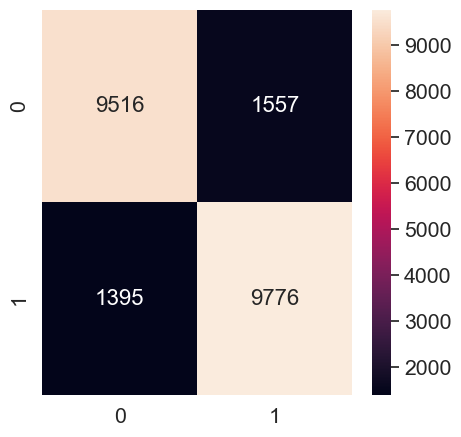

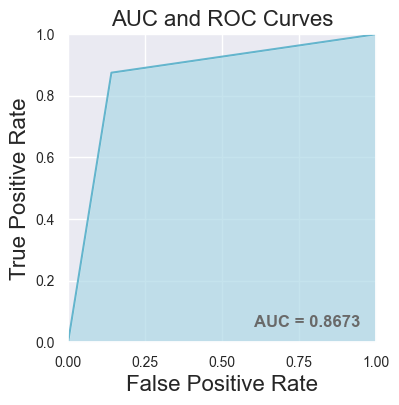

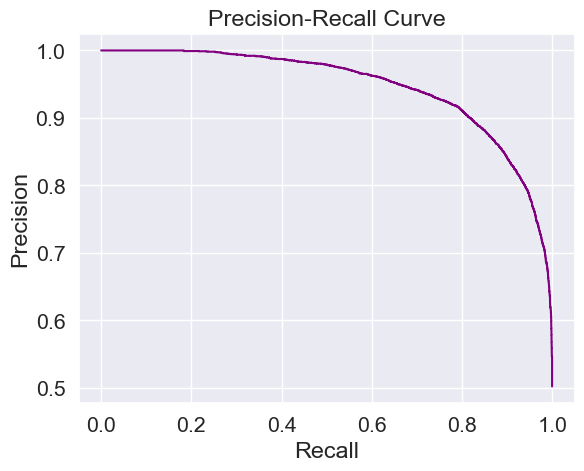

{'acc_train': 0.8722350674373796,
 'acc_test': 0.8672900557453695,
 'pre_train': 0.8672714797590912,
 'pre_test': 0.8626136062825377,
 'rec_train': 0.8784216825605189,
 'rec_test': 0.8751230865634232,
 'f_train': 0.8728109715162559,
 'f_test': 0.8688233202986135,
 'auc_train': 0.8722467272758747,
 'auc_test': 0.8672553931868863}

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
model_results(gb_clf, len(X_train), X_train, y_train, X_test, y_test)

SVC trained on 51900 samples.
SVC with Accuracy 0.5873044416471858, Precision 0.5551126612412113, Recall 0.8975919792319399, F1 0.6859820756653212, and AUC 0.5859313639499355.
Confusion Matrix :




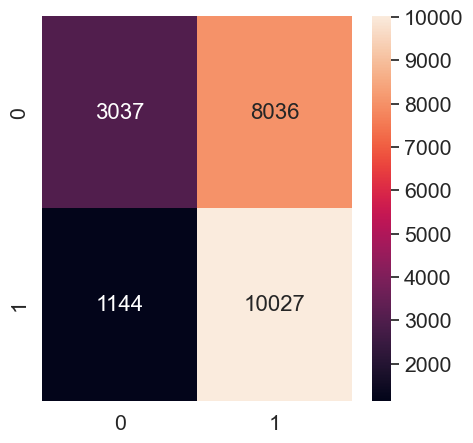

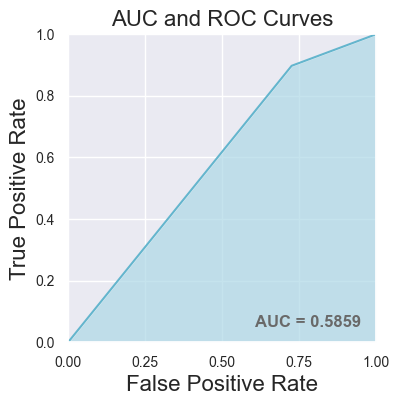

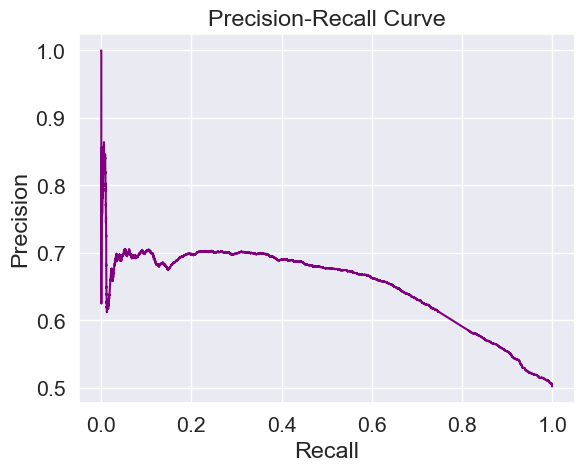

{'acc_train': 0.584971098265896,
 'acc_test': 0.5873044416471858,
 'pre_train': 0.5519896998164088,
 'pre_test': 0.5551126612412113,
 'rec_train': 0.8938264931855913,
 'rec_test': 0.8975919792319399,
 'f_train': 0.6824975678783055,
 'f_test': 0.6859820756653212,
 'auc_train': 0.5855531942830914,
 'auc_test': 0.5859313639499355}

In [45]:
svc_model = SVC(C=10, kernel='rbf', probability = True)
model_results(svc_model, len(X_train), X_train, y_train, X_test, y_test)

GaussianNB trained on 51900 samples.
GaussianNB with Accuracy 0.5108793382485165, Precision 0.5067090883939688, Recall 0.9837078148778086, F1 0.6688782031773084, and AUC 0.5087869879049026.
Confusion Matrix :




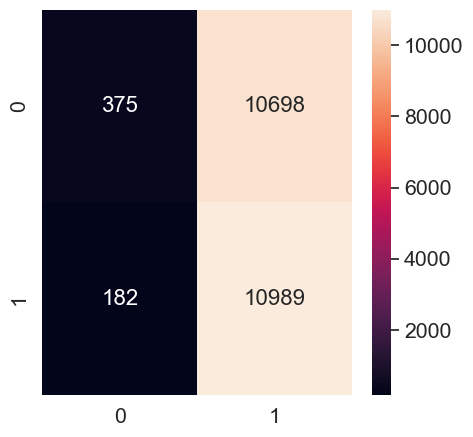

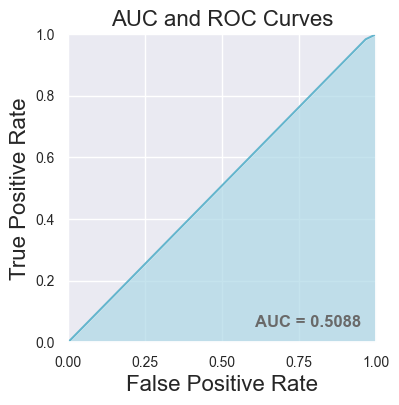

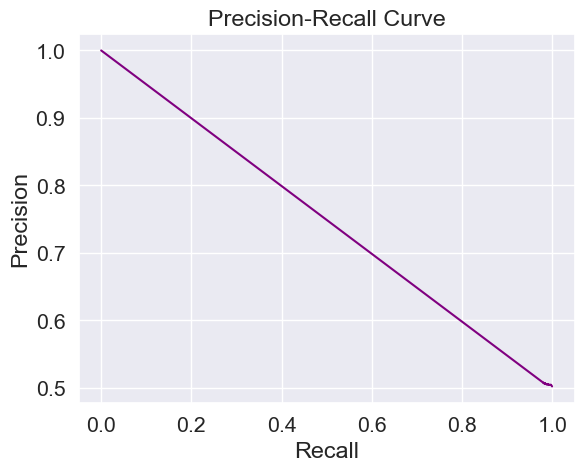

{'acc_train': 0.510019267822736,
 'acc_test': 0.5108793382485165,
 'pre_train': 0.50465718749382,
 'pre_test': 0.5067090883939688,
 'rec_train': 0.9852515346897803,
 'rec_test': 0.9837078148778086,
 'f_train': 0.667442590364597,
 'f_test': 0.6688782031773084,
 'auc_train': 0.5109149323127735,
 'auc_test': 0.5087869879049026}

In [53]:
gnb = GaussianNB()
model_results(gnb, len(X_train), X_train, y_train, X_test, y_test)

In [54]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5]}

dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, param_grid, cv=5)
grid.fit(X_train, y_train)

print('Best hyperparameters:', grid.best_params_)

Best hyperparameters: {'max_depth': 5, 'min_samples_split': 2}


DecisionTreeClassifier trained on 51900 samples.
DecisionTreeClassifier with Accuracy 0.7680273332134508, Precision 0.7388160508541916, Recall 0.8323337212425029, F1 0.7827917157770669, and AUC 0.7677427659766203.
Confusion Matrix :




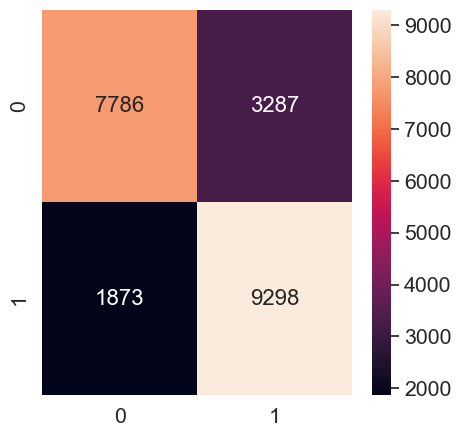

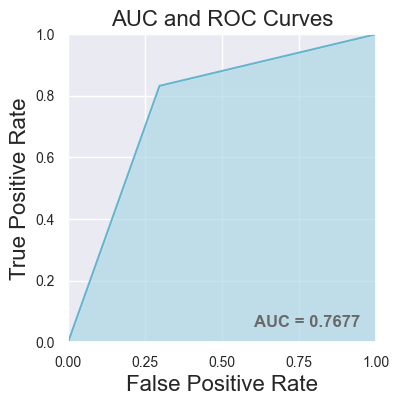

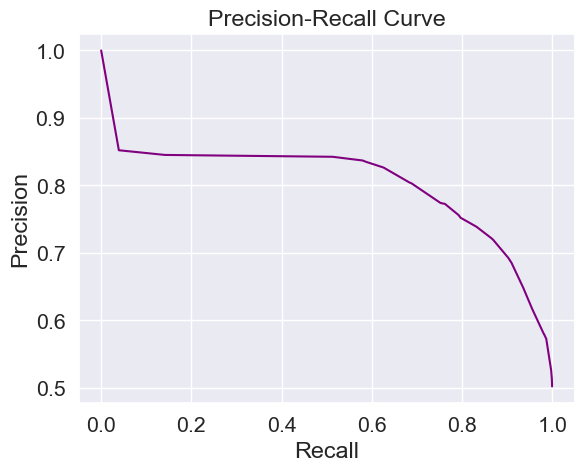

{'acc_train': 0.7727360308285164,
 'acc_test': 0.7680273332134508,
 'pre_train': 0.7404213253340606,
 'pre_test': 0.7388160508541916,
 'rec_train': 0.8386162696420988,
 'rec_test': 0.8323337212425029,
 'f_train': 0.7864655937143581,
 'f_test': 0.7827917157770669,
 'auc_train': 0.7728601945156531,
 'auc_test': 0.7677427659766203}

In [55]:
dt = DecisionTreeClassifier(max_depth = 5, min_samples_split = 2)
model_results(dt, len(X_train), X_train, y_train, X_test, y_test)

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10], 'min_samples_split': [2, 4, 8]}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5)
grid.fit(X_train, y_train)

print('Best hyperparameters:', grid.best_params_)

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier trained on 51900 samples.
RandomForestClassifier with Accuracy 0.8917910447761194, Precision 0.8746580027359782, Recall 0.9157640318682302, F1 0.8947391437442602, and AUC 0.8916849600323721.
Confusion Matrix :




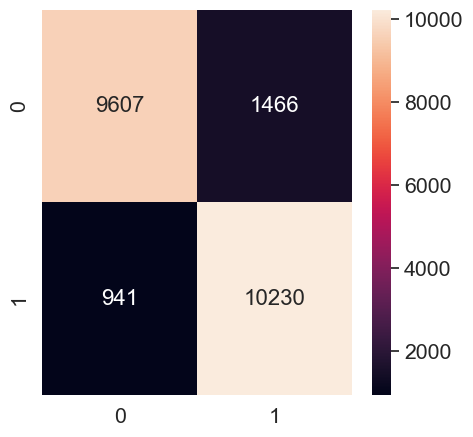

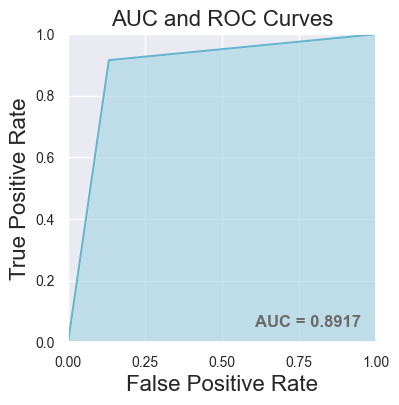

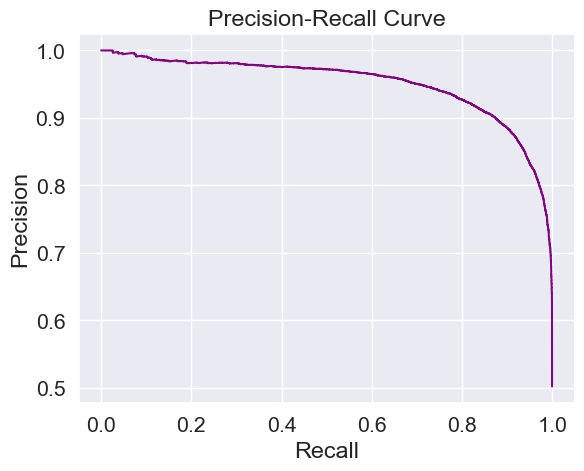

{'acc_train': 0.9158959537572254,
 'acc_test': 0.8917910447761194,
 'pre_train': 0.8991696322657177,
 'pre_test': 0.8746580027359782,
 'rec_train': 0.9364889386510173,
 'rec_test': 0.9157640318682302,
 'f_train': 0.9174499309718781,
 'f_test': 0.8947391437442602,
 'auc_train': 0.9159347651061156,
 'auc_test': 0.8916849600323721}

In [59]:
rf_b = RandomForestClassifier(max_depth = 10, min_samples_split = 2, n_estimators = 200, random_state=143)
model_results(rf_b, len(X_train), X_train, y_train, X_test, y_test)

/Users/siddartha/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression trained on 51900 samples.
LogisticRegression with Accuracy 0.7143049811185038, Precision 0.7218945816439366, Recall 0.7012801002596007, F1 0.7114380420469509, and AUC 0.7143626185394455.
Confusion Matrix :




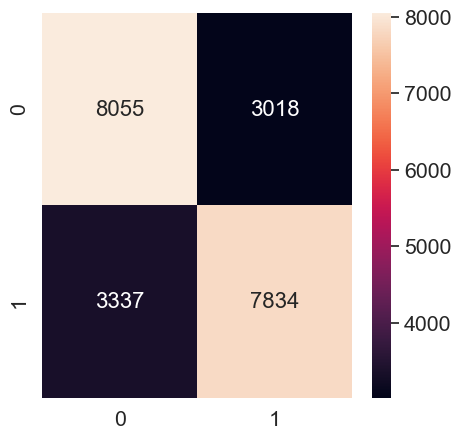

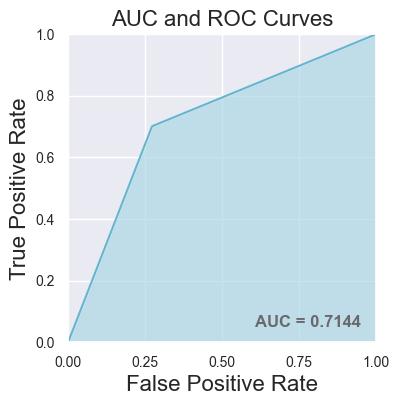

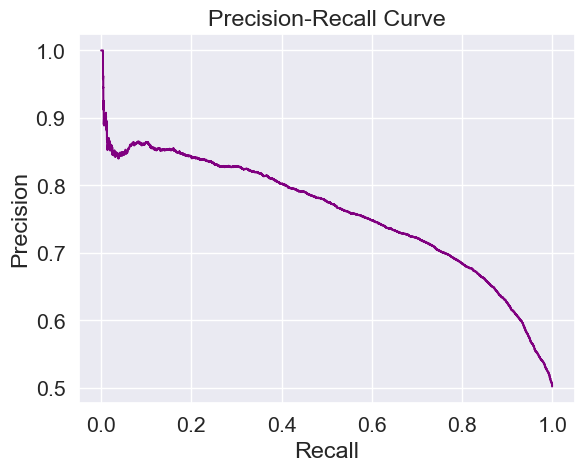

{'acc_train': 0.7161657032755299,
 'acc_test': 0.7143049811185038,
 'pre_train': 0.7236325778809962,
 'pre_test': 0.7218945816439366,
 'rec_train': 0.6977336782363616,
 'rec_test': 0.7012801002596007,
 'f_train': 0.7104471744471744,
 'f_test': 0.7114380420469509,
 'auc_train': 0.716130964661471,
 'auc_test': 0.7143626185394455}

In [61]:
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=13)
model_results(lr_l1, len(X_train), X_train, y_train, X_test, y_test)

LogisticRegression trained on 51900 samples.
LogisticRegression with Accuracy 0.695558352814242, Precision 0.6713406559164914, Recall 0.7714618207859637, F1 0.7179273575474842, and AUC 0.6952224664301894.
Confusion Matrix :




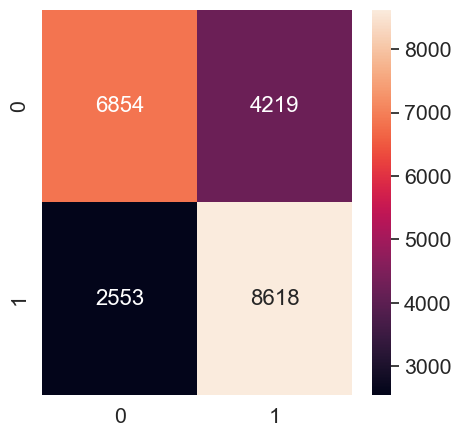

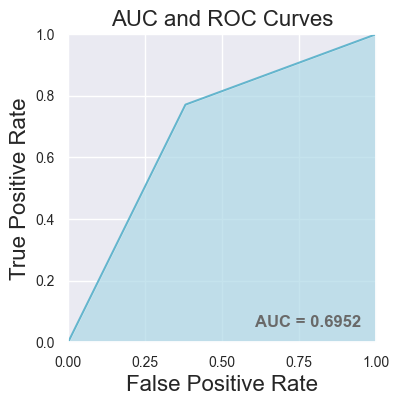

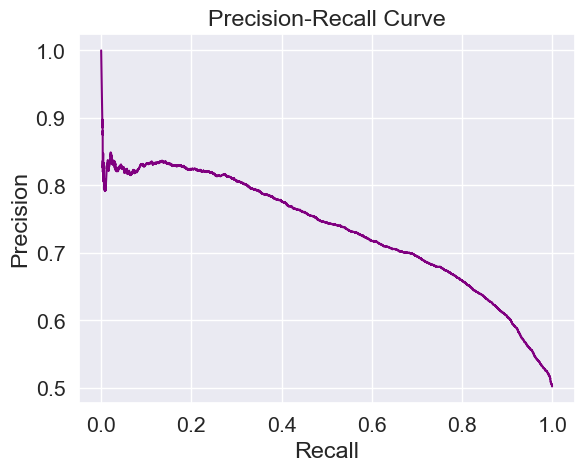

{'acc_train': 0.6965125240847784,
 'acc_test': 0.695558352814242,
 'pre_train': 0.670748940178992,
 'pre_test': 0.6713406559164914,
 'rec_train': 0.7697000115825644,
 'rec_test': 0.7714618207859637,
 'f_train': 0.7168257735109577,
 'f_test': 0.7179273575474842,
 'auc_train': 0.6966504596548923,
 'auc_test': 0.6952224664301894}

In [62]:
lr_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter = 1000000, random_state=69)
model_results(lr_l2, len(X_train), X_train, y_train, X_test, y_test)

In [63]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             fbeta_score, roc_auc_score, confusion_matrix, 
                             roc_curve, auc, precision_recall_curve)

def model_results_multiclass(model, sample_size, X_train, z_train, X_test, z_test, n_classes, average_method='weighted'):
    output = {}
    model.fit(X_train[:sample_size], z_train[:sample_size])

    # Predictions
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)

    # Evaluation metrics
    output['acc_train'] = accuracy_score(z_train, predictions_train)
    output['acc_test'] = accuracy_score(z_test, predictions_test)

    output['pre_train'] = precision_score(z_train, predictions_train, average=average_method)
    output['pre_test'] = precision_score(z_test, predictions_test, average=average_method)

    output['rec_train'] = recall_score(z_train, predictions_train, average=average_method)
    output['rec_test'] = recall_score(z_test, predictions_test, average=average_method)

    output['f_train'] = fbeta_score(z_train, predictions_train, beta=1, average=average_method)
    output['f_test'] = fbeta_score(z_test, predictions_test, beta=1, average=average_method)

    print("{} trained on {} samples.".format(model.__class__.__name__, sample_size))
    print("{} with Accuracy {}, Precision {}, and Recall {}.".format(model.__class__.__name__,
                                                                      output['acc_test'], output['pre_test'],
                                                                      output['rec_test']))

    # Confusion Matrix
    print("Confusion Matrix :")
    print("\n")
    cm = confusion_matrix(z_test, predictions_test)
    data_cm = pd.DataFrame(cm, range(n_classes), range(n_classes))
    plt.figure(figsize=(8, 8))
    sns.set(font_scale=1.4)  # label size
    sns.heatmap(data_cm, annot=True, annot_kws={"size": 12}, fmt='g', cmap='viridis')  # font size
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Precision-Recall Curve
    z_score = model.predict_proba(X_test)
    precision = dict()
    recall = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(z_test == i, z_score[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="best")
    plt.title("Precision-Recall Curve")
    plt.show()

    return output


In [64]:
# Splitting the dataset 70% training and 30% test

X = balanced_data.drop(['class','bankruptcy'], axis=1)
z = balanced_data['bankruptcy']

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = 0.3, random_state = 200)

In [88]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, 20, 50], 'min_samples_split': [2, 4, 8, 16, 20]}

rf = RandomForestClassifier(random_state=432)
grid = GridSearchCV(rf, param_grid, cv=5)
grid.fit(X_train, z_train)

print('Best hyperparameters:', grid.best_params_)

Best hyperparameters: {'max_depth': 50, 'min_samples_split': 16, 'n_estimators': 100}


RandomForestClassifier trained on 51900 samples.
RandomForestClassifier with Accuracy 0.8620302103938141, Precision 0.8603993027082562, and Recall 0.8620302103938141.
Confusion Matrix :




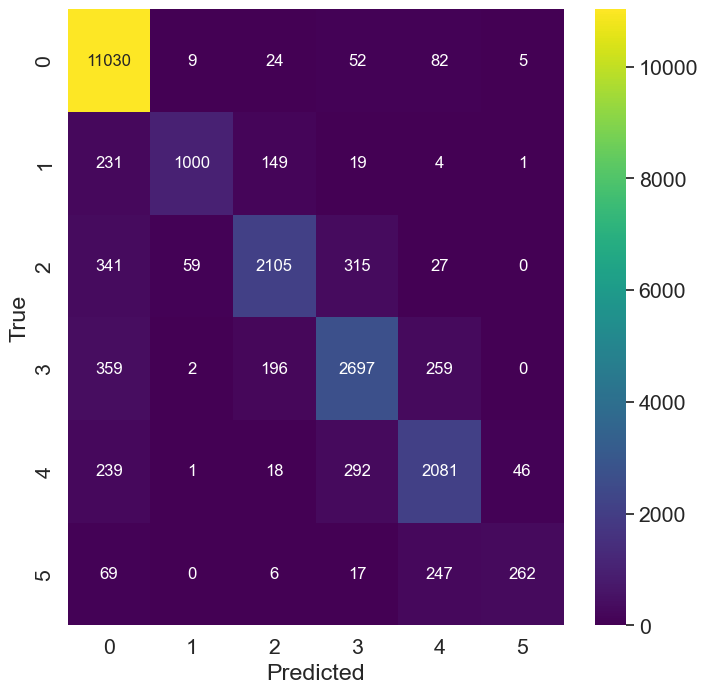

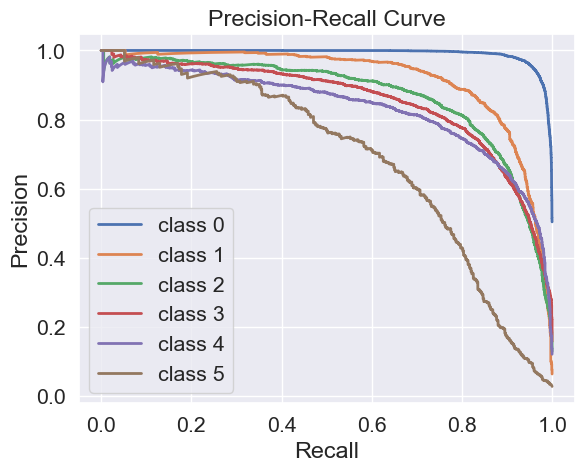

{'acc_train': 0.9746628131021194,
 'acc_test': 0.8620302103938141,
 'pre_train': 0.9747864400735473,
 'pre_test': 0.8603993027082562,
 'rec_train': 0.9746628131021194,
 'rec_test': 0.8620302103938141,
 'f_train': 0.9743214046351778,
 'f_test': 0.8571345884036077}

In [65]:
rf_m = RandomForestClassifier(max_depth = 50, min_samples_split = 16, n_estimators = 100, random_state=143)
model_results_multiclass(rf_m, len(X_train), X_train, z_train, X_test, z_test, 6, 'weighted')

In [66]:
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8]}

dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, param_grid, cv=5)
grid.fit(X_train, z_train)

print('Best hyperparameters:', grid.best_params_)

KeyboardInterrupt: 

/Users/siddartha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/siddartha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier trained on 51900 samples.
DecisionTreeClassifier with Accuracy 0.5286369358029132, Precision 0.3269103867244416, and Recall 0.5286369358029132.
Confusion Matrix :




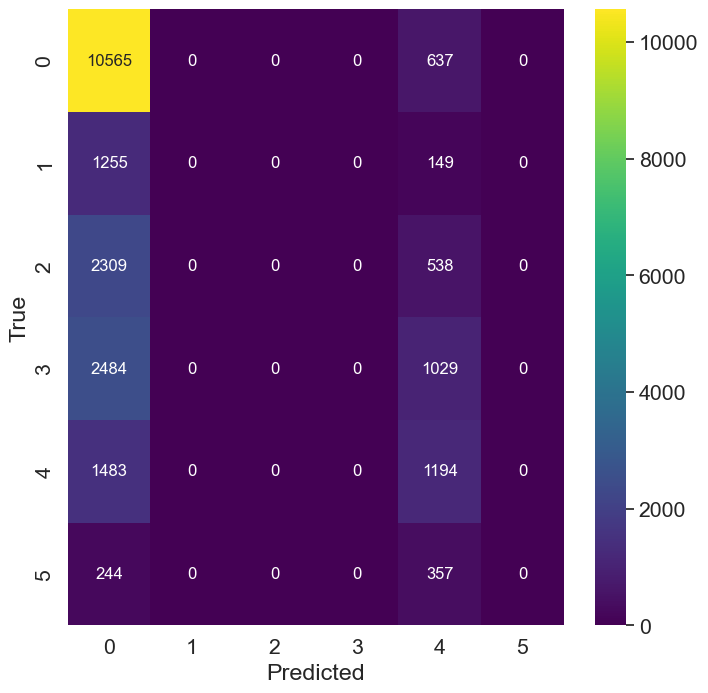

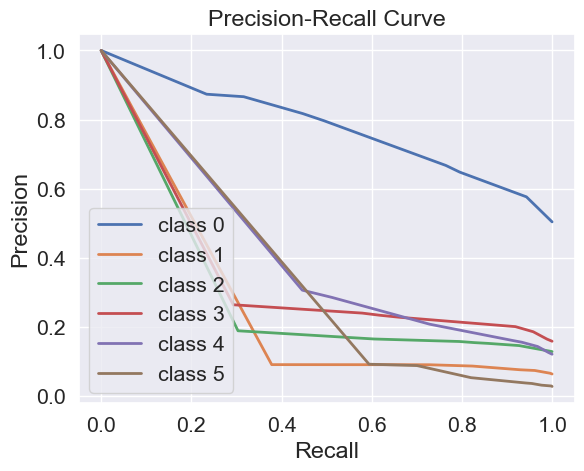

{'acc_train': 0.5250481695568401,
 'acc_test': 0.5286369358029132,
 'pre_train': 0.3213203884920939,
 'pre_test': 0.3269103867244416,
 'rec_train': 0.5250481695568401,
 'rec_test': 0.5286369358029132,
 'f_train': 0.3984713781269906,
 'f_test': 0.4038682890558414}

In [67]:
dt_m = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2)
model_results_multiclass(dt_m, len(X_train), X_train, z_train, X_test, z_test, 6, 'weighted')

In [98]:
k_range = range(2, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)
grid.fit(X_train, z_train)

print('Best hyperparameters:', grid.best_params_)

Best hyperparameters: {'n_neighbors': 9}


KNeighborsClassifier trained on 51900 samples.
KNeighborsClassifier with Accuracy 0.7277917640712103, Precision 0.7497248539201687, and Recall 0.7277917640712103.
Confusion Matrix :




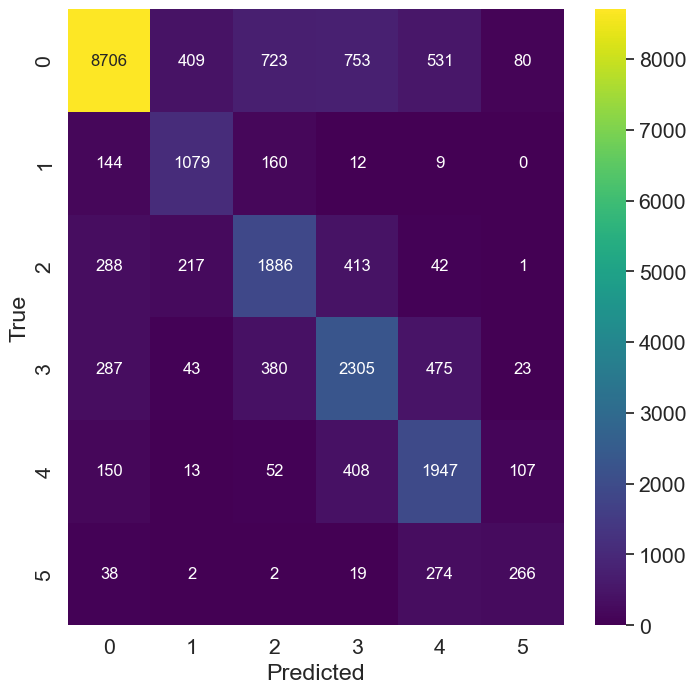

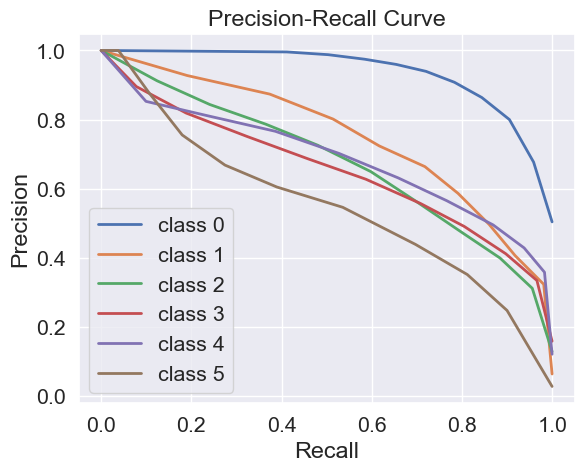

{'acc_train': 0.7864354527938343,
 'acc_test': 0.7277917640712103,
 'pre_train': 0.8001848426231624,
 'pre_test': 0.7497248539201687,
 'rec_train': 0.7864354527938343,
 'rec_test': 0.7277917640712103,
 'f_train': 0.790352107494331,
 'f_test': 0.7341818725964121}

In [68]:
knn = KNeighborsClassifier(n_neighbors=9)
model_results_multiclass(knn, len(X_train), X_train, z_train, X_test, z_test, 6, 'weighted')

In [71]:
from xgboost import XGBClassifier

In [70]:
xgb_model = XGBClassifier(objective='multi:softmax', num_class=6)
param_grid = {'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [3, 5, 7],
              'n_estimators': [50, 100, 200]}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, z_train)

print(grid_search.best_params_)

KeyboardInterrupt: 

XGBClassifier trained on 51900 samples.
XGBClassifier with Accuracy 0.8863963315950368, Precision 0.8861250647974312, and Recall 0.8863963315950368.
Confusion Matrix :




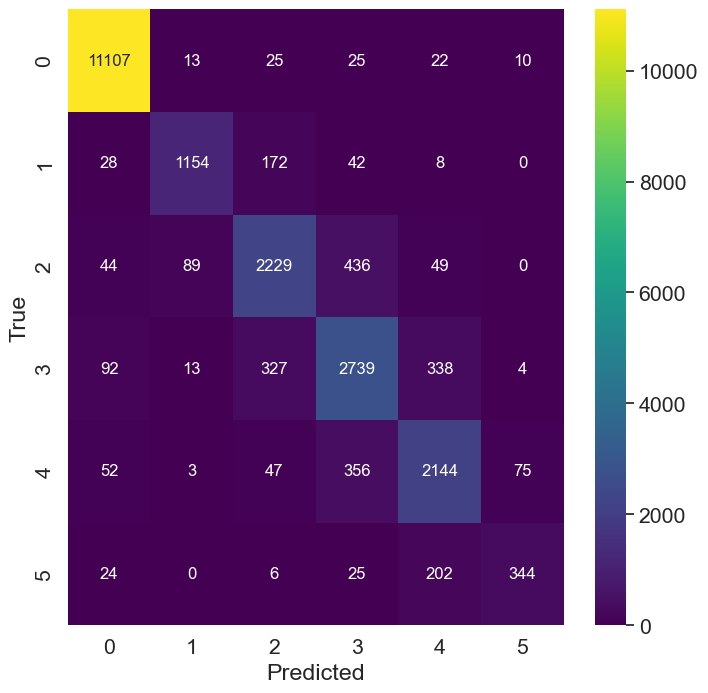

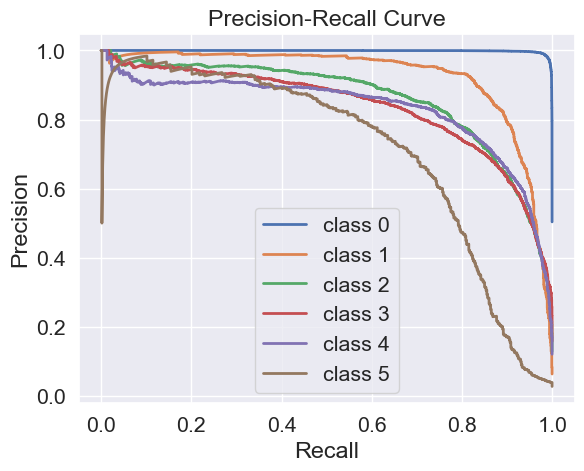

{'acc_train': 0.9926396917148362,
 'acc_test': 0.8863963315950368,
 'pre_train': 0.9926354210817289,
 'pre_test': 0.8861250647974312,
 'rec_train': 0.9926396917148362,
 'rec_test': 0.8863963315950368,
 'f_train': 0.9926360370989235,
 'f_test': 0.8855621182663486}

In [72]:
xgb_m = XGBClassifier(objective='multi:softmax',  num_class=6, learning_rate = 0.5, max_depth = 5, n_estimators = 200)
model_results_multiclass(xgb_m, len(X_train), X_train, z_train, X_test, z_test, 6, 'weighted')

In [104]:
param_grid = {'learning_rate': [0.05, 0.1, 0.15],
              'n_estimators': [50, 100, 150],
              'max_depth': [3, 5, 7]}

# Initialize the classifier and perform grid search
gb = GradientBoostingClassifier()
grid_search = GridSearchCV(gb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy score
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}


GradientBoostingClassifier trained on 51900 samples.
GradientBoostingClassifier with Accuracy 0.5816399928070491, Precision 0.5504633678227049, and Recall 0.5816399928070491.
Confusion Matrix :




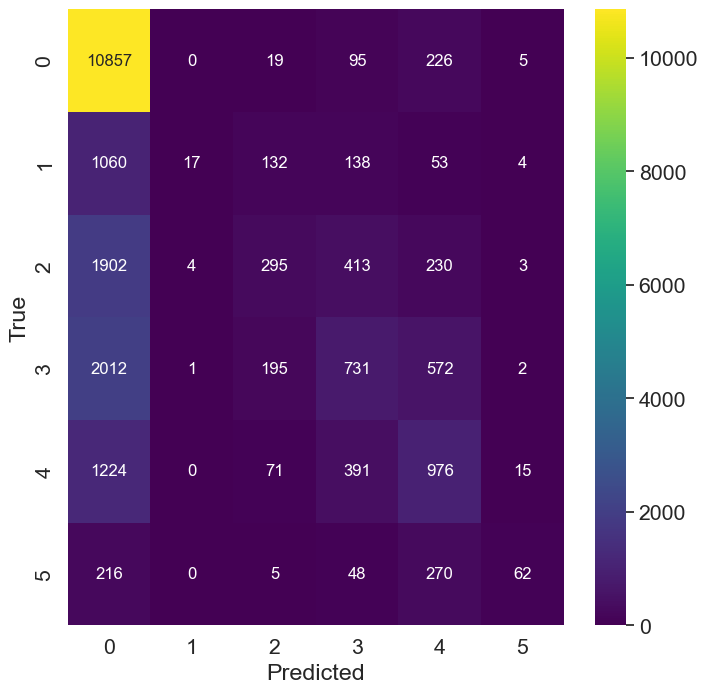

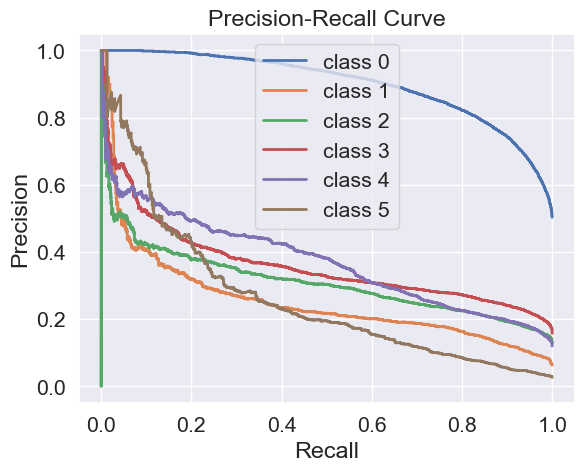

{'acc_train': 0.5838150289017341,
 'acc_test': 0.5816399928070491,
 'pre_train': 0.568449300298611,
 'pre_test': 0.5504633678227049,
 'rec_train': 0.5838150289017341,
 'rec_test': 0.5816399928070491,
 'f_train': 0.5046501760828147,
 'f_test': 0.5018594432522249}

In [73]:
gb_m = GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=50)
model_results_multiclass(gb_m, len(X_train), X_train, z_train, X_test, z_test, 6, 'weighted')